In [51]:
# title: viz_osm_stats.ipynb
# visualises district wise stats of amenities in osm
# input:  "data/ap districts 2025 simplified.geojson"
# input: for example fuel "data/amenity_fuel_df.csv"
# output: visualisation on AP as a chloropeth map

In [52]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
filepath=Path("data/ap districts 2025 simplified.geojson")
gdf = gpd.read_file(filepath)
# from gdf, get relation_id from id "relation/<number>"
gdf['relation_id']=gdf['id'].str.extract(r".+/(.+)").astype('Int64')

In [53]:
#get ap outline to add as a base for chloropeth maps
# merged_polygon = gdf['geometry'].union_all()
# Convert the single geometry into a new GeoDataFrame, use the following if required
# ap_outline_gdf = gpd.GeoDataFrame(geometry=[merged_polygon], crs=gdf.crs)
# print(f"Type of outline_gdf: {type(ap_outline_gdf)}")

In [54]:
# read "data/amenity_fuel_df.csv"
# Path to your CSV file (change 'data.csv' to your file name or path)
amenity_path = 'data/amenity_fuel_df.csv'
amenity_name ='Fuel station'
# Read the CSV file into a DataFrame
try:
    amenity_df = pd.read_csv(amenity_path)

    # Display the first 5 rows of the DataFrame
    print("DataFrame successfully loaded:")
    print(amenity_df.head())

except FileNotFoundError:
    print(f"Error: The file '{amenity_path}' was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")
    
# group by district to display a chloropeth
# categorize amenity_df by 'district_name' and 'type' and display counts
district_counts_df = amenity_df.groupby(['district']).size().reset_index(name='count')
# total number of amenities found
total_amenities =  district_counts_df['count'].sum()
district_counts_max= district_counts_df['count'].max()
district_counts_df['count_percent']= round(district_counts_df['count']*100/district_counts_max,2)
print(f"Total number of amenities: {total_amenities}, max count:{district_counts_max}")
# rename 'district' as 'relation_id'
district_counts_df.columns = ['relation_id' if x=='district' else x for x in district_counts_df.columns]


DataFrame successfully loaded:
           @id @type       @lat       @lon              name  district  \
0  11573749340  node  18.043865  82.035089                HP  13999461   
1  11721909943  node  17.589704  81.714692  Bharat Petroleum  13999461   
2  11885478640  node  17.423110  81.791977        Indian Oil  13999461   
3  11885839704  node  17.429312  81.790714  Bharat Petroleum  13999461   
4  11891752435  node  17.751994  81.406887                HP  13999461   

           district_name  
0  Alluri Sitharama Raju  
1  Alluri Sitharama Raju  
2  Alluri Sitharama Raju  
3  Alluri Sitharama Raju  
4  Alluri Sitharama Raju  
Total number of amenities: 1182, max count:95


In [55]:
# gdf merge
merged_gdf = pd.merge(
    gdf,
    district_counts_df,
    on='relation_id',
    how='inner'
)

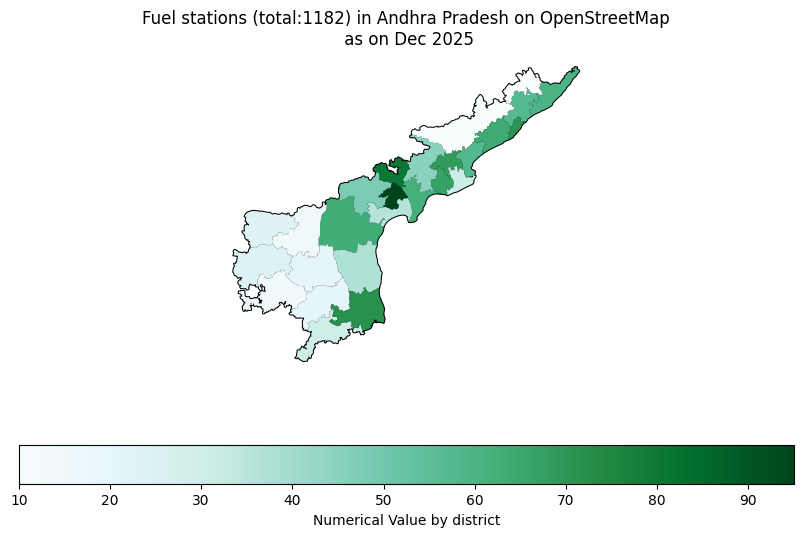

In [ ]:
#  'merged_gdf' will be the basemap,'gdf' will be the overlay to show the district boundaries
# 1. Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# 2. Plot the base map (e.g., countries)
# Use zorder=1 to place it at the bottom
merged_gdf.plot(ax=ax,
    column='count',
    cmap='BuGn',            # Choose a colormap
    legend=True,              # Display a legend
    legend_kwds={'label': "Numerical Value by district", 'orientation': "horizontal"}, zorder=2
)

# 3. Plot the second gdf (e.g., cities) as an overlay
# Use zorder=2 (or higher) to ensure it's on top
gdf.plot(ax=ax,     facecolor="none",       # Makes the interior of the polygons transparent
    edgecolor="black",      # Sets the edge color to opaque black
    linewidth=1.5,           # Sets the edge width,
    zorder=1)

# Optional: Customize the plot
ax.set_title(f"{amenity_name}s (total:{total_amenities}) in Andhra Pradesh on OpenStreetMap\n as on Dec 2025")
# Remove axis labels for a cleaner map appearance
ax.set_axis_off() 

# save plot
plt.savefig(f'data/{amenity_name} chloropeth map.png', dpi=300)
# Display the map
plt.show()